In [1]:
import torch
import torchvision
import h5py
import numpy as np
import keras
import tensorflow as tf
from main import EfficientNetB0
import efficientnet.tfkeras as efn
from keras import layers
from torch import nn
from torchvision import transforms
from keras.applications import imagenet_utils
import matplotlib.pyplot as plt
from functools import reduce
from operator import __add__
import math
from torch.nn import functional as F

In [2]:
import tensorflow.python.ops.numpy_ops.np_config as np_config
np_config.enable_numpy_behavior()

In [3]:
model224 = tf.keras.models.load_model('model', compile=False)

In [103]:
model = efn.EfficientNetB0(weights='imagenet',input_shape=(128,128,3), include_top=False)

In [104]:
for i,l in enumerate(model.layers):
    if l.get_weights():
        
        try:
            print(i, l.get_config()['name'])
            print(l.get_weights()[0].shape)
        except:
            continue

1 stem_conv
(3, 3, 3, 32)
2 stem_bn
(32,)
4 block1a_dwconv
(3, 3, 32, 1)
5 block1a_bn
(32,)
9 block1a_se_reduce
(1, 1, 32, 8)
10 block1a_se_expand
(1, 1, 8, 32)
12 block1a_project_conv
(1, 1, 32, 16)
13 block1a_project_bn
(16,)
14 block2a_expand_conv
(1, 1, 16, 96)
15 block2a_expand_bn
(96,)
17 block2a_dwconv
(3, 3, 96, 1)
18 block2a_bn
(96,)
22 block2a_se_reduce
(1, 1, 96, 4)
23 block2a_se_expand
(1, 1, 4, 96)
25 block2a_project_conv
(1, 1, 96, 24)
26 block2a_project_bn
(24,)
27 block2b_expand_conv
(1, 1, 24, 144)
28 block2b_expand_bn
(144,)
30 block2b_dwconv
(3, 3, 144, 1)
31 block2b_bn
(144,)
35 block2b_se_reduce
(1, 1, 144, 6)
36 block2b_se_expand
(1, 1, 6, 144)
38 block2b_project_conv
(1, 1, 144, 24)
39 block2b_project_bn
(24,)
42 block3a_expand_conv
(1, 1, 24, 144)
43 block3a_expand_bn
(144,)
45 block3a_dwconv
(5, 5, 144, 1)
46 block3a_bn
(144,)
50 block3a_se_reduce
(1, 1, 144, 6)
51 block3a_se_expand
(1, 1, 6, 144)
53 block3a_project_conv
(1, 1, 144, 40)
54 block3a_project_bn
(4

In [5]:
# model224 = efn.EfficientNetB0(weights='imagenet',include_top=False)

In [22]:
for i,l in enumerate(model224.layers):
    if l.get_weights():
        
        try:
            print(i, l.get_config()['name'])
            print(l.get_weights()[0].shape)
        except:
            continue

1 stem_conv
(3, 3, 5, 32)
2 stem_bn
(32,)
4 block1a_dwconv
(3, 3, 32, 1)
5 block1a_bn
(32,)
9 block1a_se_reduce
(1, 1, 32, 8)
10 block1a_se_expand
(1, 1, 8, 32)
12 block1a_project_conv
(1, 1, 32, 16)
13 block1a_project_bn
(16,)
14 block2a_expand_conv
(1, 1, 16, 96)
15 block2a_expand_bn
(96,)
17 block2a_dwconv
(3, 3, 96, 1)
18 block2a_bn
(96,)
22 block2a_se_reduce
(1, 1, 96, 4)
23 block2a_se_expand
(1, 1, 4, 96)
25 block2a_project_conv
(1, 1, 96, 24)
26 block2a_project_bn
(24,)
27 block2b_expand_conv
(1, 1, 24, 144)
28 block2b_expand_bn
(144,)
30 block2b_dwconv
(3, 3, 144, 1)
31 block2b_bn
(144,)
35 block2b_se_reduce
(1, 1, 144, 6)
36 block2b_se_expand
(1, 1, 6, 144)
38 block2b_project_conv
(1, 1, 144, 24)
39 block2b_project_bn
(24,)
42 block3a_expand_conv
(1, 1, 24, 144)
43 block3a_expand_bn
(144,)
45 block3a_dwconv
(5, 5, 144, 1)
46 block3a_bn
(144,)
50 block3a_se_reduce
(1, 1, 144, 6)
51 block3a_se_expand
(1, 1, 6, 144)
53 block3a_project_conv
(1, 1, 144, 40)
54 block3a_project_bn
(4

In [23]:
# effnet = EfficientNetB0(input_shape=[1, 3, 1024, 1024], num_channels=3)
effnet224 = EfficientNetB0(input_shape=[1, 5, 128, 128],num_channels=5)

In [24]:
for k,v in effnet224.state_dict().items():
    print(k,v.shape)

conv1.weight torch.Size([32, 5, 3, 3])
batch_norm1.weight torch.Size([32])
batch_norm1.bias torch.Size([32])
batch_norm1.running_mean torch.Size([32])
batch_norm1.running_var torch.Size([32])
batch_norm1.num_batches_tracked torch.Size([])
block_list.0.depth_conv.weight torch.Size([32, 1, 3, 3])
block_list.0.batch_norm_depth.weight torch.Size([32])
block_list.0.batch_norm_depth.bias torch.Size([32])
block_list.0.batch_norm_depth.running_mean torch.Size([32])
block_list.0.batch_norm_depth.running_var torch.Size([32])
block_list.0.batch_norm_depth.num_batches_tracked torch.Size([])
block_list.0.conv_se_reduce.weight torch.Size([8, 32, 1, 1])
block_list.0.conv_se_reduce.bias torch.Size([8])
block_list.0.conv_se_expand.weight torch.Size([32, 8, 1, 1])
block_list.0.conv_se_expand.bias torch.Size([32])
block_list.0.conv_output.weight torch.Size([16, 32, 1, 1])
block_list.0.batch_norm_last.weight torch.Size([16])
block_list.0.batch_norm_last.bias torch.Size([16])
block_list.0.batch_norm_last.r

In [25]:
# initialize the state dictionary from the pytorch model to be editted
# sd = effnet.state_dict()
sd224 = effnet224.state_dict()

In [26]:
keras_pytorch_convert = {'se_reduce':'conv_se_reduce','se_expand':'conv_se_expand','project_conv':'conv_output',
                       'expand_conv':'conv_expand', 'dwconv':'depth_conv','top_conv':'conv_final','probs':'linear',
                      'stem_conv':'conv1', 'stem_bn':'batch_norm1', 'top_bn':'batch_norm_final','expand_bn':'batch_norm_exp',
                        'bn':'batch_norm_depth','project_bn':'batch_norm_last'}

In [27]:
# doesnt work on depth conv
# transpose works on everything else

In [28]:
# layer = -1
# name = ''
# for i,l in enumerate(model.layers):
#     if l.get_weights():
#         org_name = l.get_config()['name']
#         weights = l.get_weights()
#         # any weights in a block unit
#         if org_name[0:5] == 'block':
#             if org_name[5:7] != name:
#                 layer += 1
#                 name=org_name[5:7]
#             base_pyt = 'block_list.'
#             print('======'*7)
#             print('keras')
#             print('pytorch')
#             print(org_name)
#             if keras_pytorch_convert.get(org_name[8:]):
#                 use = keras_pytorch_convert[org_name[8:]]
#                 py_name = f'{base_pyt}{layer}.{use}'
#                 if org_name[8:] == 'dwconv':
#                     new_weights = torch.from_numpy(weights[0]).permute(2,3,0,1)
#                     sd[py_name+'.weight'] = new_weights
#                 # any non batchnorm or non depthconv layer
#                 elif 'bn' not in org_name:
#                     new_weights = weights[0]
#                     if 'conv' in org_name:
#                         new_weights = torch.from_numpy(np.moveaxis(new_weights, [-1, -2], [0, 1]))
#                     else:
#                         new_weights = torch.from_numpy(new_weights.T)
#                     sd[py_name+'.weight'] = new_weights
#                     # this means theres a bias to account for
#                     if len(weights)>1:
#                         new_weights = weights[1]
#                         new_weights = torch.from_numpy(new_weights)
#                         sd[py_name+'.bias'] = new_weights
#                 # its a batchnorm layer
#                 else:
#                     new_weights = weights[0]
#                     new_weights = torch.from_numpy(new_weights)
#                     sd[py_name+'.weight'] = new_weights
#                     # this means theres a bias to account for
#                     if len(weights)>1:
#                         new_weights = [torch.from_numpy(i) for i in weights]
#                         sd[py_name+'.bias'] = new_weights[1]
#                         sd[py_name+'.running_mean'] = new_weights[2]
#                         sd[py_name+'.running_var'] = new_weights[3]
#             else:
#                 continue
#         # initial convs or final convs
#         else:
#             print('======'*7)
#             print(org_name)
#             py_name = keras_pytorch_convert[org_name]
#             if 'bn' in org_name:
#                 new_weights = torch.from_numpy(weights[0])
#             else:
#                 new_weights = torch.from_numpy(np.moveaxis(weights[0], [-1, -2], [0, 1]))
#             sd[py_name+'.weight'] = new_weights
#             # handle bias weights as well
#             if len(weights) > 1:
#                 new_weights = [torch.from_numpy(i) for i in weights]
#                 sd[py_name+'.bias'] = new_weights[1]
#                 if org_name == 'probs':
#                     continue
#                 sd[py_name+'.running_mean'] = new_weights[2]
#                 sd[py_name+'.running_var'] = new_weights[3]

                

In [29]:
layer = -1
name = ''
for i,l in enumerate(model224.layers):
    if l.get_weights():
        org_name = l.get_config()['name']
        weights = l.get_weights()
        # any weights in a block unit
        if org_name[0:5] == 'block':
            if org_name[5:7] != name:
                layer += 1
                name=org_name[5:7]
            base_pyt = 'block_list.'
            print('======'*7)
            print('keras')
            print('pytorch')
            print(org_name)
            if keras_pytorch_convert.get(org_name[8:]):
                use = keras_pytorch_convert[org_name[8:]]
                py_name = f'{base_pyt}{layer}.{use}'
                if org_name[8:] == 'dwconv':
                    new_weights = torch.from_numpy(weights[0]).permute(2,3,0,1)
                    sd224[py_name+'.weight'] = new_weights
                # any non batchnorm or non depthconv layer
                elif 'bn' not in org_name:
                    new_weights = weights[0]
                    if 'conv' in org_name:
                        new_weights = torch.from_numpy(np.moveaxis(new_weights, [-1, -2], [0, 1]))
                    else:
                        new_weights = torch.from_numpy(new_weights.T)
                    sd224[py_name+'.weight'] = new_weights
                    # this means theres a bias to account for
                    if len(weights)>1:
                        new_weights = weights[1]
                        new_weights = torch.from_numpy(new_weights)
                        sd224[py_name+'.bias'] = new_weights
                # its a batchnorm layer
                else:
                    new_weights = weights[0]
                    new_weights = torch.from_numpy(new_weights)
                    sd224[py_name+'.weight'] = new_weights
                    # this means theres a bias to account for
                    if len(weights)>1:
                        new_weights = [torch.from_numpy(i) for i in weights]
                        sd224[py_name+'.bias'] = new_weights[1]
                        sd224[py_name+'.running_mean'] = new_weights[2]
                        sd224[py_name+'.running_var'] = new_weights[3]
            else:
                continue
        # initial convs or final convs
        else:
            print('======'*7)
            print(org_name)
            py_name = keras_pytorch_convert[org_name]
            if 'bn' in org_name:
                new_weights = torch.from_numpy(weights[0])
            else:
                new_weights = torch.from_numpy(np.moveaxis(weights[0], [-1, -2], [0, 1]))
            sd224[py_name+'.weight'] = new_weights
            # handle bias weights as well
            if len(weights) > 1:
                new_weights = [torch.from_numpy(i) for i in weights]
                sd224[py_name+'.bias'] = new_weights[1]
                if org_name == 'probs':
                    continue
                sd224[py_name+'.running_mean'] = new_weights[2]
                sd224[py_name+'.running_var'] = new_weights[3]

                

stem_conv
stem_bn
keras
pytorch
block1a_dwconv
keras
pytorch
block1a_bn
keras
pytorch
block1a_se_reduce
keras
pytorch
block1a_se_expand
keras
pytorch
block1a_project_conv
keras
pytorch
block1a_project_bn
keras
pytorch
block2a_expand_conv
keras
pytorch
block2a_expand_bn
keras
pytorch
block2a_dwconv
keras
pytorch
block2a_bn
keras
pytorch
block2a_se_reduce
keras
pytorch
block2a_se_expand
keras
pytorch
block2a_project_conv
keras
pytorch
block2a_project_bn
keras
pytorch
block2b_expand_conv
keras
pytorch
block2b_expand_bn
keras
pytorch
block2b_dwconv
keras
pytorch
block2b_bn
keras
pytorch
block2b_se_reduce
keras
pytorch
block2b_se_expand
keras
pytorch
block2b_project_conv
keras
pytorch
block2b_project_bn
keras
pytorch
block3a_expand_conv
keras
pytorch
block3a_expand_bn
keras
pytorch
block3a_dwconv
keras
pytorch
block3a_bn
keras
pytorch
block3a_se_reduce
keras
pytorch
block3a_se_expand
keras
pytorch
block3a_project_conv
keras
pytorch
block3a_project_bn
keras
pytorch
block3b_expand_conv
keras


In [30]:
# effnet.load_state_dict(sd)
effnet224.load_state_dict(sd224)

<All keys matched successfully>

In [31]:
x = np.random.rand(1,128,128,5)
# x = np.ones((224,224,3))
x = np.array(x)
x_t = torch.from_numpy(x)
x_t = x_t.permute(0,3,1,2).float()
print(x.shape, x_t.shape)

(1, 128, 128, 5) torch.Size([1, 5, 128, 128])


In [32]:
extractor = keras.Model(inputs=model224.inputs,
                        outputs={layer.get_config()['name']:layer.output for layer in model224.layers})
features = extractor.predict(x)

In [34]:
#pyt version
effnet224.eval()
y_t = effnet224(x_t)

In [92]:
effnet224.block_list[11].outputs.keys()

dict_keys(['conv_expand', 'expand_bn', 'expand_activation', 'depth_conv', 'depth_bn', 'depth_activation', 'post_se'])

In [38]:
list(features.keys())

['input_1',
 'stem_conv',
 'stem_bn',
 'stem_activation',
 'block1a_dwconv',
 'block1a_bn',
 'block1a_activation',
 'block1a_se_squeeze',
 'block1a_se_reshape',
 'block1a_se_reduce',
 'block1a_se_expand',
 'block1a_se_excite',
 'block1a_project_conv',
 'block1a_project_bn',
 'block2a_expand_conv',
 'block2a_expand_bn',
 'block2a_expand_activation',
 'block2a_dwconv',
 'block2a_bn',
 'block2a_activation',
 'block2a_se_squeeze',
 'block2a_se_reshape',
 'block2a_se_reduce',
 'block2a_se_expand',
 'block2a_se_excite',
 'block2a_project_conv',
 'block2a_project_bn',
 'block2b_expand_conv',
 'block2b_expand_bn',
 'block2b_expand_activation',
 'block2b_dwconv',
 'block2b_bn',
 'block2b_activation',
 'block2b_se_squeeze',
 'block2b_se_reshape',
 'block2b_se_reduce',
 'block2b_se_expand',
 'block2b_se_excite',
 'block2b_project_conv',
 'block2b_project_bn',
 'block2b_drop',
 'block2b_add',
 'block3a_expand_conv',
 'block3a_expand_bn',
 'block3a_expand_activation',
 'block3a_dwconv',
 'block3a_b

In [93]:
# test_pyt = effnet.outputs['block_11'].permute(0,2,3,1)
# test_pyt224 = effnet224.outputs['block_11'].permute(0,2,3,1)
# test_pyt = effnet.block_list[11].outputs['expand_activation'].permute(0,2,3,1)
test_pyt224 = effnet224.block_list[11].outputs['depth_activation'].permute(0,2,3,1)
# print(test_pyt.shape)
print(test_pyt224.shape)
# test_pyt = test_pyt.numpy()
test_pyt224 = test_pyt224.numpy()

torch.Size([1, 4, 4, 672])


In [94]:
test_keras224 = features['block6a_activation']
# test_keras224 = features224['top_activation']
# print(test_keras.shape)
print(test_keras224.shape)

(1, 4, 4, 672)


In [95]:
test_keras224[0,0:3,0:3,0:3], test_pyt224[0,0:3,0:3,0:3],

(array([[[0.5215106 , 2.6274853 , 2.6583    ],
         [0.35191387, 2.6309886 , 3.3082232 ],
         [0.34756783, 2.892181  , 3.177054  ]],
 
        [[0.28860474, 2.5796857 , 3.340957  ],
         [0.12704715, 2.0260663 , 4.153456  ],
         [0.21224499, 3.355221  , 3.8773036 ]],
 
        [[0.3585996 , 2.9980595 , 3.346279  ],
         [0.05484995, 2.650094  , 4.1571045 ],
         [0.0551489 , 2.430919  , 4.0163326 ]]], dtype=float32),
 array([[[0.52142817, 2.6269476 , 2.6586509 ],
         [0.35206494, 2.6303596 , 3.308476  ],
         [0.3477304 , 2.8923368 , 3.1775138 ]],
 
        [[0.28847444, 2.5779686 , 3.3415337 ],
         [0.1269167 , 2.024873  , 4.1538277 ],
         [0.21217783, 3.3556051 , 3.87764   ]],
 
        [[0.35855407, 2.998244  , 3.3466375 ],
         [0.05481426, 2.6509435 , 4.157258  ],
         [0.055015  , 2.4307082 , 4.0166883 ]]], dtype=float32))

In [96]:
# test_pyt_f = test_pyt.flatten()
# test_keras_f = test_keras.flatten()
test_pyt_f224 = test_pyt224.flatten()
test_keras_f224 = test_keras224.flatten()
# differences = test_keras_f - test_pyt_f
differences224 = test_keras_f224 - test_pyt_f224

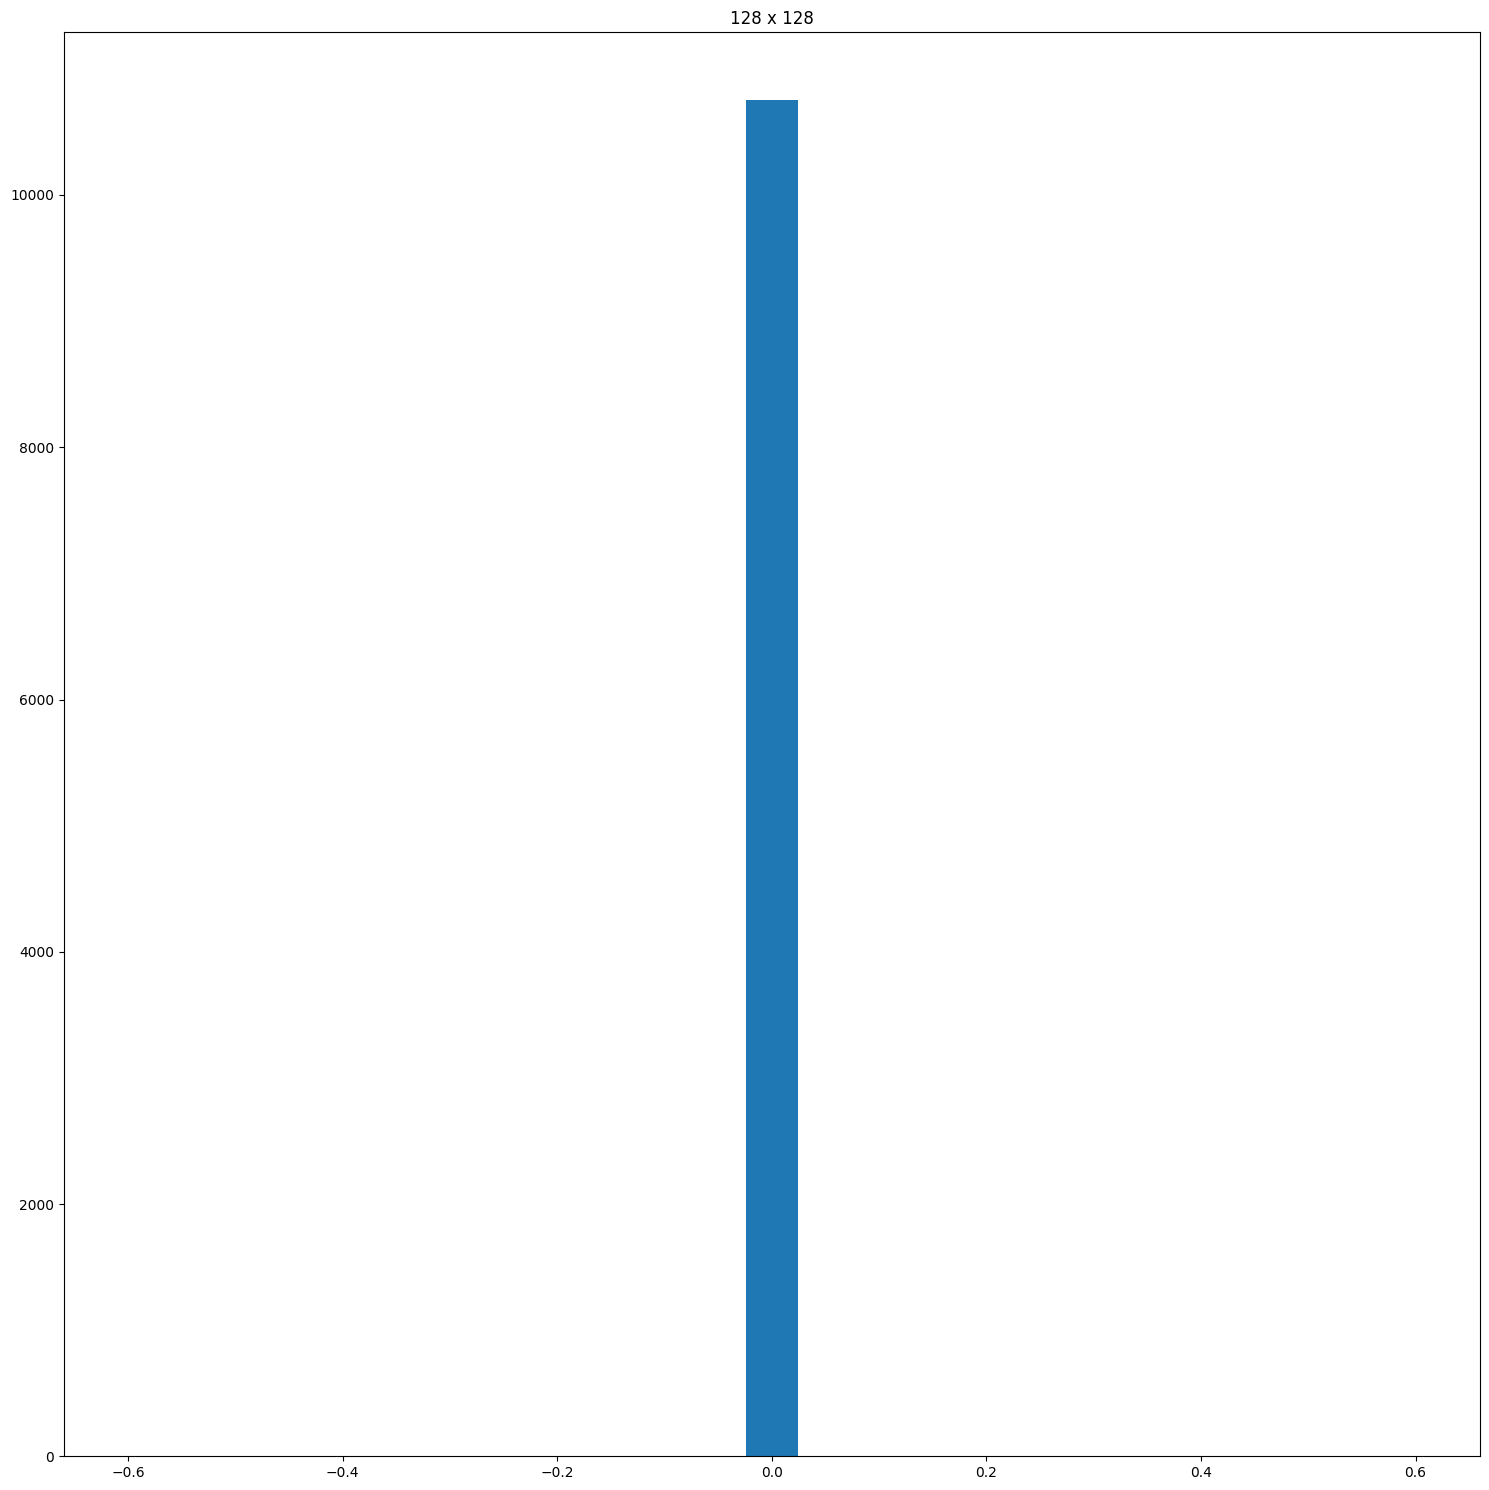

In [102]:
fig,axs = plt.subplots(1,1)
fig.set_figheight(15)
fig.set_figwidth(15)
# axs[0].hist(differences, bins=25, range=(-.6,.6));
# axs[0].set_title('1024 x 1024');
axs.hist(differences224, bins=25, range=(-.6,.6));
axs.set_title('128 x 128');
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

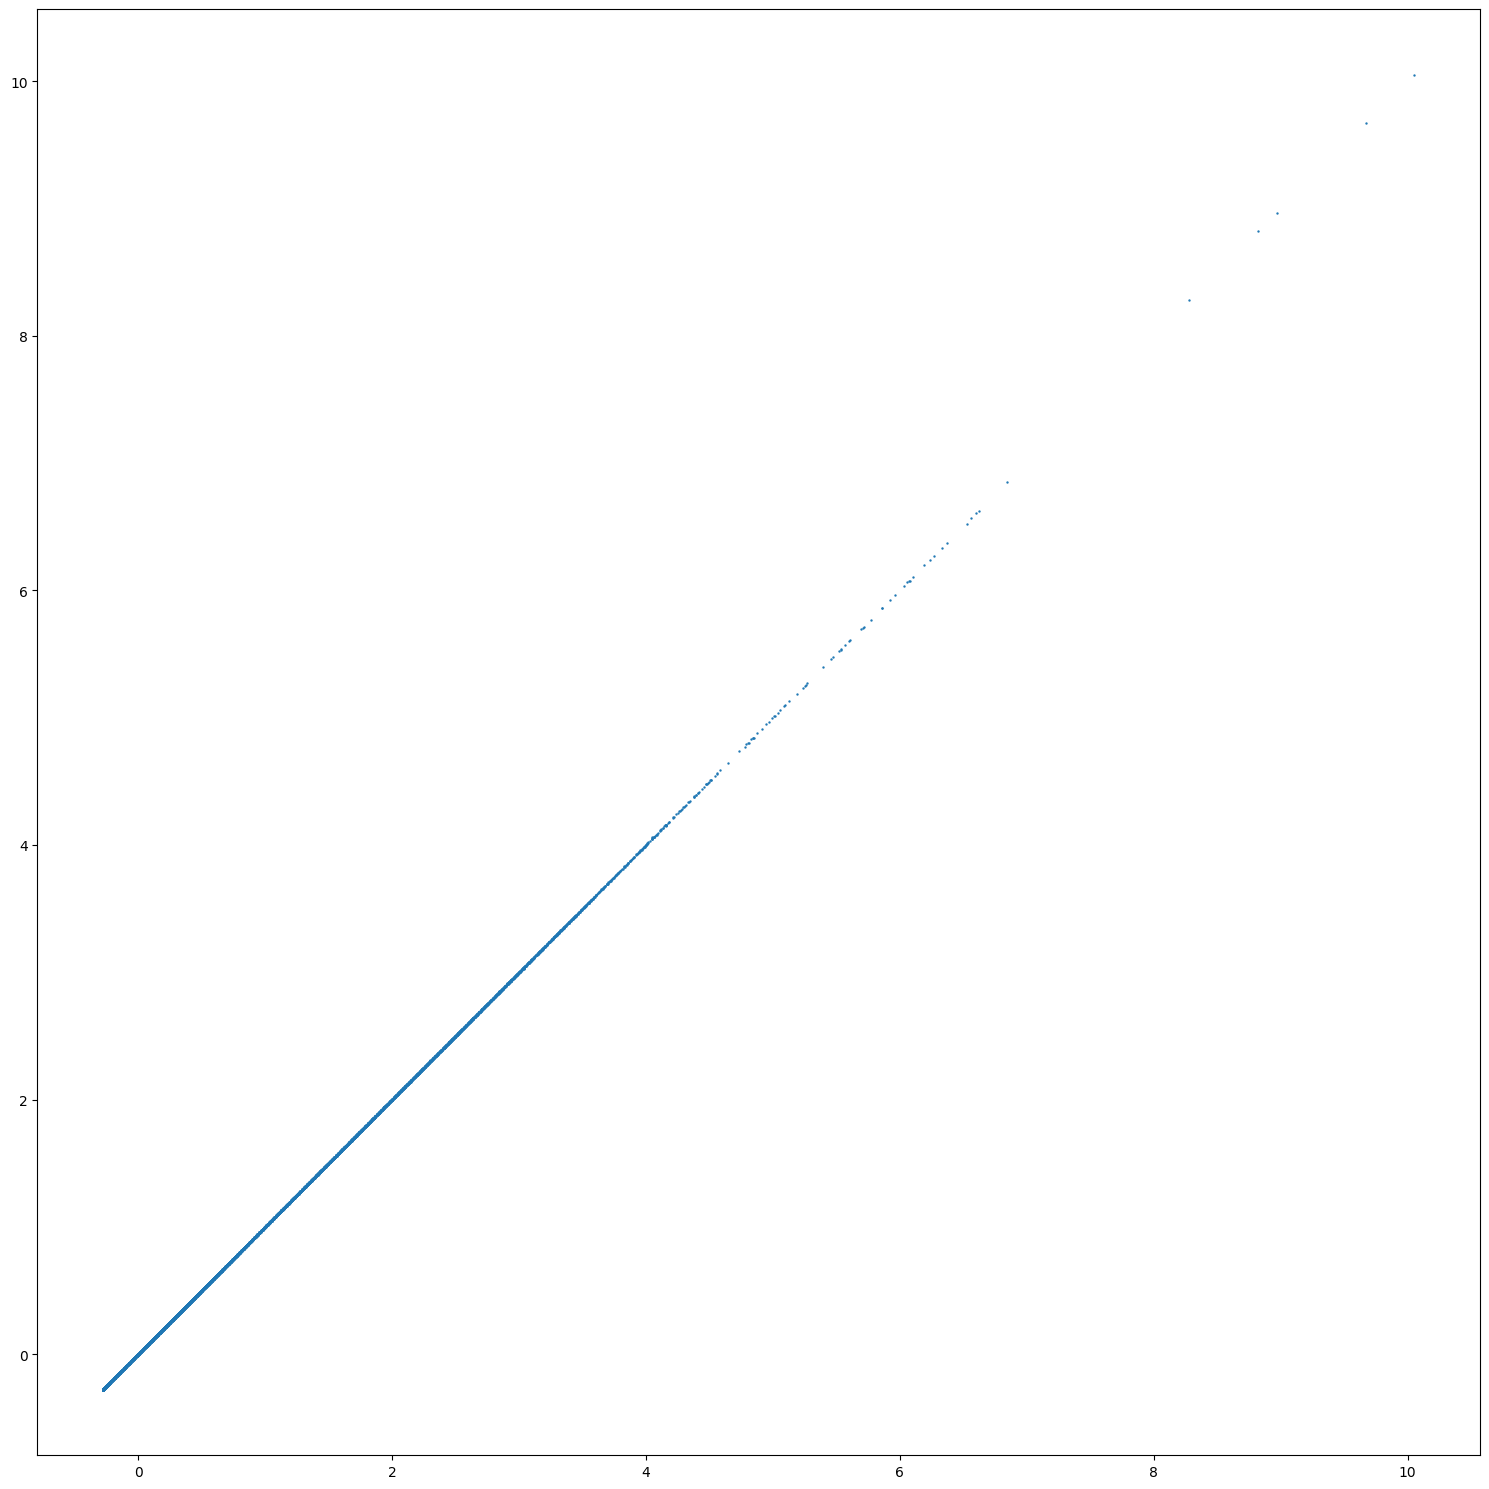

In [101]:
plt.clf()
fig,ax = plt.subplots(1,1)
fig.set_figheight(15)
fig.set_figwidth(15)
# axs[0].title.set_text('1024 x 1024');
axs.title.set_text('224 x 224');
# ax[0].scatter(test_keras_f, test_pyt_f,s=.5)
# ax[0].autoscale()
ax.scatter(test_keras_f224, test_pyt_f224,s=.5)
ax.autoscale()

plt.tight_layout()
plt.show()

In [28]:
def correct_pad(input_shape, kernel_size):
    """Returns a tuple for zero-padding for 2D convolution with downsampling.
    Args:
      input_shape: Input img shape
      kernel_size: An integer or tuple/list of 2 integers.
    Returns:
      A tuple.
    """
    img_dim = 2
    input_size = list(input_shape)[img_dim: (img_dim + 2)]
    # 128, 128
    if type(kernel_size):
        kernel_size = (kernel_size, kernel_size)
    # 3, 3
    if input_size[0] is None:
        adjust = (1, 1)
    else:
        adjust = (1 - input_size[0] % 2, 1 - input_size[1] % 2)
    correct = (kernel_size[0] // 2, kernel_size[1] // 2)
    return (
        correct[1] - adjust[1], correct[1],
        correct[0] - adjust[0], correct[0],
    )

In [29]:
# (top, bottom) (left, right)
imagenet_utils.correct_pad(x,3), correct_pad([1, 3, 224, 224],3)

(((0, 1), (0, 1)), (0, 1, 0, 1))

In [30]:
x = np.random.rand(224,224,3)
# x = np.ones((224,224,3))
x = np.array([x])
x_t = torch.from_numpy(x)
x_t = x_t.permute(0,3,1,2).float()
print(x.shape, x_t.shape)

(1, 224, 224, 3) torch.Size([1, 3, 224, 224])


In [31]:
class Conv2dStaticSamePadding(nn.Conv2d):
    """2D Convolutions like TensorFlow's 'SAME' mode, with the given input image size.
       The padding mudule is calculated in construction function, then used in forward.
    """

    # With the same calculation as Conv2dDynamicSamePadding

    def __init__(self, in_channels, out_channels, kernel_size, stride=1, image_size=None, **kwargs):
        super().__init__(in_channels, out_channels, kernel_size, stride, **kwargs)
        self.stride = self.stride if len(self.stride) == 2 else [self.stride[0]] * 2

        # Calculate padding based on image size and save it
        assert image_size is not None
        ih, iw = (image_size, image_size) if isinstance(image_size, int) else image_size
        kh, kw = self.weight.size()[-2:]
        sh, sw = self.stride
        oh, ow = math.ceil(ih / sh), math.ceil(iw / sw)
        pad_h = max((oh - 1) * self.stride[0] + (kh - 1) * self.dilation[0] + 1 - ih, 0)
        pad_w = max((ow - 1) * self.stride[1] + (kw - 1) * self.dilation[1] + 1 - iw, 0)
        if pad_h > 0 or pad_w > 0:
            self.static_padding = nn.ZeroPad2d((pad_w // 2, pad_w - pad_w // 2,
                                                pad_h // 2, pad_h - pad_h // 2))
        else:
            self.static_padding = nn.Identity()

    def forward(self, x):
        x = self.static_padding(x)
        x = F.conv2d(x, self.weight, self.bias, self.stride, self.padding, self.dilation, self.groups)
        return x

In [32]:
weights = model.layers[1].get_weights()[0]
print('keras weights: ',weights.shape)
keras_conv = layers.Conv2D(32, 3, strides=2, padding="same", use_bias=False, weights=np.array([weights]),data_format="channels_last")
pyt_conv = Conv2dStaticSamePadding(3, 32, kernel_size=3, stride=2, bias=False, image_size=(224,224))
sd = pyt_conv.state_dict()
weights_t = torch.from_numpy(weights).permute(3,2,0,1)
# weights_t = torch.from_numpy(weights.T)
print('torch weights: ',weights_t.shape)
sd['weight']= weights_t 
pyt_conv.load_state_dict(sd)

keras weights:  (3, 3, 3, 32)
torch weights:  torch.Size([32, 3, 3, 3])


<All keys matched successfully>

In [33]:
x1 = keras_conv(x)[0]
x_t1 = pyt_conv(x_t)[0]

In [34]:
x1.shape, x_t1.shape

(TensorShape([112, 112, 32]), torch.Size([32, 112, 112]))

In [35]:
x1[0:5,0:5,1], x_t1.permute(1,2,0)[0:5,0:5,1],

(<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
 array([[-1.3494959 ,  0.5543534 ,  3.0781245 ,  1.6901358 ,  0.30144387],
        [-2.0934129 ,  1.3858722 ,  1.282087  ,  1.2473533 , -0.4225492 ],
        [-1.669033  , -0.27600378, -1.4978772 ,  1.7089008 , -1.9023061 ],
        [-1.8657866 , -0.89420825, -0.94685996, -0.73779756, -0.6532067 ],
        [ 0.18777086, -0.1811703 ,  0.9137982 , -1.1493417 , -1.0782577 ]],
       dtype=float32)>,
 tensor([[-1.3495,  0.5544,  3.0781,  1.6901,  0.3014],
         [-2.0934,  1.3859,  1.2821,  1.2474, -0.4225],
         [-1.6690, -0.2760, -1.4979,  1.7089, -1.9023],
         [-1.8658, -0.8942, -0.9469, -0.7378, -0.6532],
         [ 0.1878, -0.1812,  0.9138, -1.1493, -1.0783]],
        grad_fn=<SelectBackward0>))

In [36]:
val = np.random.rand(1,224,224,3).astype("float32")
weights = np.random.rand(3, 3, 3, 32).astype("float32")

tf_in = tf.constant(val)
v = tf.Variable(weights)

tf_out = tf.nn.conv2d(tf_in, v, strides=2, padding='SAME').numpy()

pt_in = torch.tensor(val).permute(0,3,1,2)

pt_l = Conv2dSamePadding(3, 32, kernel_size=3, stride=2, padding=None, bias=False)
pt_l.weight = torch.nn.Parameter(torch.tensor(weights).permute(3,2,0,1))
pt_out = pt_l(pt_in)
pt_out = pt_out.permute(0,2,3,1).detach().numpy()
print(tf_out.shape)
print(tf_out[0][0,0,0:5])
print(pt_out[0][0,0,0:5])
assert np.allclose(tf_out, pt_out,atol=1e-7)

NameError: name 'Conv2dSamePadding' is not defined

In [ ]:
# calculating output size
strides = (2,2)
stride_height, stride_width = strides
in_height, in_width = 224, 224
out_height = np.ceil(in_height / stride_height)
out_width = np.ceil(in_width / stride_width)
print(f'with input size ({in_height},{in_width}), produces output size ({out_height},{out_width})')
filter_height, filter_width = 3, 3

if (in_height % strides[0] == 0):
  pad_along_height = max(filter_height - stride_height, 0)
else:
  pad_along_height = max(filter_height - (in_height % stride_height), 0)
if (in_width % strides[1] == 0):
  pad_along_width = max(filter_width - stride_width, 0)
else:
  pad_along_width = max(filter_width - (in_width % stride_width), 0)
print(pad_along_height, pad_along_width)
pad_top = pad_along_height // 2
pad_bottom = pad_along_height - pad_top
pad_left = pad_along_width // 2
pad_right = pad_along_width - pad_left
print(pad_left, pad_right, pad_top, pad_bottom)